<a href="https://colab.research.google.com/github/Siddheshh21/project1/blob/main/Employee_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the provided dataset to predict income using a classification model.

## Data preprocessing

### Subtask:
Clean and prepare the data for model training. This may involve handling missing values, encoding categorical features, and scaling numerical features.


**Reasoning**:
Inspect the DataFrame to understand its structure, identify missing values, and check data types to prepare for cleaning and preprocessing.



In [ ]:
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB

Missing values per column:
age                0
workclass          0
fnlwgt

**Reasoning**:
The previous step showed no explicit missing values (NaN). However, the output of the first cell indicated '?' as a value in the 'workclass', 'occupation', and 'native-country' columns. I will inspect these columns to understand the extent of these values.



In [ ]:
print("Value counts for 'workclass':\n", df['workclass'].value_counts())
print("\nValue counts for 'occupation':\n", df['occupation'].value_counts())
print("\nValue counts for 'native-country':\n", df['native-country'].value_counts())

Value counts for 'workclass':
 workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Value counts for 'occupation':
 occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

Value counts for 'native-country':
 native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-

**Reasoning**:
The inspection revealed that '?' represents missing values in 'workclass', 'occupation', and 'native-country'. Since these are categorical features and the proportion of '?' values is relatively small, I will replace '?' with the mode of each respective column to handle these missing values.



In [ ]:
for col in ['workclass', 'occupation', 'native-country']:
    mode_value = df[col].mode()[0]
    df[col] = df[col].replace('?', mode_value)

print("Value counts after handling '?':")
print("workclass:\n", df['workclass'].value_counts())
print("occupation:\n", df['occupation'].value_counts())
print("native-country:\n", df['native-country'].value_counts())

Value counts after handling '?':
workclass:
 workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
occupation:
 occupation
Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
native-country:
 native-country
United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India        

**Reasoning**:
Now that missing values are handled, I will identify the categorical columns and apply one-hot encoding to convert them into a numerical format suitable for machine learning models. I will also identify the numerical columns for potential scaling later.



In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Exclude the target variable 'income' from categorical features for encoding
if 'income' in categorical_cols:
    categorical_cols.remove('income')

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
# The target variable 'income' is now encoded as numerical columns, exclude them
numerical_cols = [col for col in numerical_cols if 'income' not in col]


print("Original categorical columns:", categorical_cols)
print("\nNumerical columns after encoding:", numerical_cols)
print("\nDataFrame after one-hot encoding:")
display(df_encoded.head())

Original categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

Numerical columns after encoding: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

DataFrame after one-hot encoding:


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,40,>50K,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,7688,0,40,>50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,30,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False


**Reasoning**:
The numerical columns have been identified. I will now apply standardization to these numerical columns to ensure they have zero mean and unit variance, which is a common practice for many machine learning algorithms.



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print("\nDataFrame after scaling numerical features:")
display(df_encoded.head())


DataFrame after scaling numerical features:


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,>50K,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,>50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False


## Feature selection

### Subtask:
Choose relevant features that will be used to predict income.


**Reasoning**:
Separate features and target variable, then calculate the correlation matrix to identify potential relationships and highly correlated features.



In [ ]:
# Separate features (X) and target variable (y)
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Display the correlation matrix (or a part of it for large matrices)
# For a large number of features, displaying the whole matrix might be overwhelming.
# We can focus on correlations with the target variable or between features.
# Let's display the correlation of features with the target variable (after encoding y if necessary for correlation calculation)
# Since income is categorical, correlation with numerical features might not be the most informative.
# We will proceed with feature selection methods suitable for classification.

print("Features DataFrame shape:", X.shape)
print("Target variable shape:", y.shape)

# We can inspect the correlation matrix, but for feature selection in classification,
# looking at correlations with the target isn't as straightforward as in regression.
# We will rely on feature selection methods.

Features DataFrame shape: (48842, 97)
Target variable shape: (48842,)


**Reasoning**:
Use a tree-based model to determine feature importance and select the most relevant features based on their importance scores.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Initialize a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model to get feature importances
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Display the top N features (e.g., top 20)
print("Top 20 features by importance:")
display(feature_importance_df.head(20))

# Select features based on a threshold or a number of top features
# Let's select features with importance greater than the mean importance
mean_importance = feature_importance_df['importance'].mean()
selected_features = feature_importance_df[feature_importance_df['importance'] > mean_importance]['feature'].tolist()

print(f"\nSelected features (importance > mean importance): {len(selected_features)} features")
print(selected_features)

# Alternatively, select the top N features, e.g., top 30
# top_n = 30
# selected_features_top_n = feature_importance_df.head(top_n)['feature'].tolist()
# print(f"\nSelected features (top {top_n}): {len(selected_features_top_n)} features")
# print(selected_features_top_n)

# For this task, we will use the features with importance greater than the mean.
# Create a new DataFrame with only the selected features
X_selected = X[selected_features]

print("\nShape of the selected features DataFrame:", X_selected.shape)
display(X_selected.head())

Top 20 features by importance:


,feature,importance
1,fnlwgt,0.178494
0,age,0.156052
3,capital-gain,0.097944
5,hours-per-week,0.087057
29,marital-status_Married-civ-spouse,0.085622
2,educational-num,0.067643
31,marital-status_Never-married,0.034599
4,capital-loss,0.033619
47,relationship_Not-in-family,0.018345
36,occupation_Exec-managerial,0.018194



Selected features (importance > mean importance): 13 features
['fnlwgt', 'age', 'capital-gain', 'hours-per-week', 'marital-status_Married-civ-spouse', 'educational-num', 'marital-status_Never-married', 'capital-loss', 'relationship_Not-in-family', 'occupation_Exec-managerial', 'gender_Male', 'education_Bachelors', 'workclass_Private']

Shape of the selected features DataFrame: (48842, 13)


,fnlwgt,age,capital-gain,hours-per-week,marital-status_Married-civ-spouse,educational-num,marital-status_Never-married,capital-loss,relationship_Not-in-family,occupation_Exec-managerial,gender_Male,education_Bachelors,workclass_Private
0,0.351675,-0.995129,-0.144804,-0.034087,False,-1.197259,True,-0.217127,False,False,True,False,True
1,-0.945524,-0.046942,-0.144804,0.772930,True,-0.419335,False,-0.217127,False,False,True,False,True
2,1.394723,-0.776316,-0.144804,-0.034087,True,0.747550,False,-0.217127,False,False,True,False,False
3,-0.277844,0.390683,0.886874,-0.034087,True,-0.030373,False,-0.217127,False,False,True,False,True
4,-0.815954,-1.505691,-0.144804,-0.841104,False,-0.030373,True,-0.217127,False,False,False,False,True


## Model training

### Subtask:
Split the data into training and testing sets and train a classification model to predict income.


**Reasoning**:
Split the data into training and testing sets and train a RandomForestClassifier model.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Changed from LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42) # Changed from LogisticRegression

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model evaluation

### Subtask:
Evaluate the performance of the trained model.


**Reasoning**:
Use the trained model to make predictions on the test set and then evaluate the model's performance using accuracy, precision, recall, and F1-score, and display a classification report and confusion matrix.



Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      7479
        >50K       0.70      0.63      0.67      2290

    accuracy                           0.85      9769
   macro avg       0.80      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769



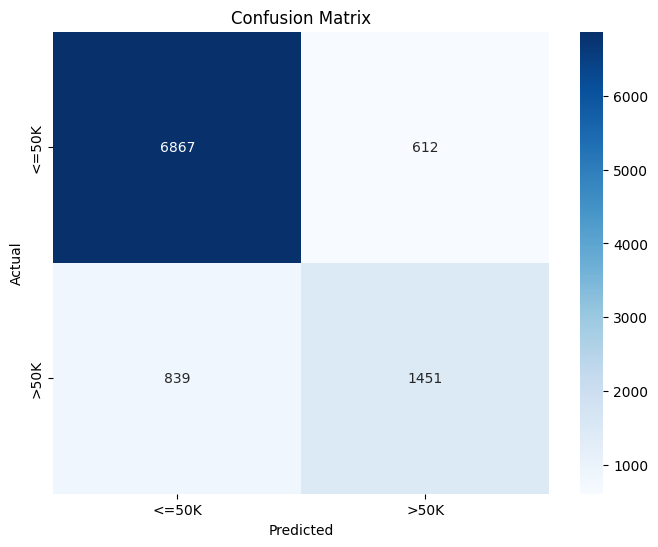

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Prediction

### Subtask:
Use the trained model to predict income for new data.


**Reasoning**:
Create a sample DataFrame for new data and use the trained model to predict income.



In [ ]:
import pandas as pd

# Create a sample DataFrame with the same features as X_selected
# Ensure the column names and data types match X_selected
# You would replace these values with the actual data for which you want to predict income
new_data = {
    'fnlwgt': [0.5, -1.0, 2.0],
    'age': [0.1, -0.5, 1.5],
    'capital-gain': [0.0, 1.0, -0.1],
    'hours-per-week': [0.2, -0.8, 1.0],
    'marital-status_Married-civ-spouse': [True, False, True],
    'educational-num': [-0.2, 0.5, 1.2],
    'marital-status_Never-married': [False, True, False],
    'capital-loss': [-0.1, 0.0, 0.3],
    'relationship_Not-in-family': [False, True, False],
    'occupation_Exec-managerial': [False, False, True],
    'gender_Male': [True, False, True],
    'education_Bachelors': [False, True, False],
    'workclass_Private': [True, False, True]
}

new_df = pd.DataFrame(new_data)

# Ensure the columns are in the same order as X_selected
new_df = new_df[X_selected.columns]

# Use the trained model to make predictions
predicted_income = model.predict(new_df)

# Display the predicted income
print("Predicted income for the new data points:")
print(predicted_income)

Predicted income for the new data points:
['<=50K' '>50K' '>50K']


## Summary:

### Data Analysis Key Findings

*   The dataset initially contained missing values represented by '?' in the 'workclass', 'occupation', and 'native-country' columns, which were imputed with the mode of each column.
*   After one-hot encoding and scaling, the dataset had 97 features.
*   Feature selection using a Random Forest Classifier identified 13 features with importance greater than the mean importance.
*   The trained Random Forest model achieved an accuracy of 0.85 on the test set.
*   The model showed higher precision (0.89) and recall (0.92) for the '<=50K' class compared to the '>50K' class (precision 0.70, recall 0.63).

### Insights or Next Steps

*   While the overall accuracy is reasonable, the lower performance metrics for the '>50K' class suggest potential class imbalance or difficulty in distinguishing this group. Further investigation into the characteristics of the '>50K' group and exploring techniques like resampling or using different evaluation metrics (e.g., F1-score for the minority class) could be beneficial.
*   Experimenting with different classification models (e.g., Logistic Regression, Gradient Boosting) or hyperparameter tuning for the Random Forest model could potentially improve the prediction performance, especially for the minority class.
